# Exploratory Data Analysis

In [292]:
# Importar las librerias o paquetes que necesitemos
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [293]:
data = pd.read_csv("data.csv")
print(data.shape)
data.head(1)

(4478, 52)


,Power,I1,I2,I3,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48
0,9751.855054,7.82412,7.711217,7.659327,26.98123,26.98123,26.973406,26.98123,26.98123,26.98123,26.98123,26.98123,25.676113,25.676113,25.668289,25.676113,25.676113,25.676113,25.676113,25.676113,26.671016,26.671016,26.671016,26.671016,26.671016,26.663305,26.671016,26.671016,26.671016,26.671016,26.671016,26.671016,25.299624,25.299624,25.299624,25.299624,26.994014,26.994014,26.994014,27.049819,26.994014,26.994014,25.923836,25.923836,25.916177,25.923836,25.923836,25.923836,25.923836,25.916177,25.923836,25.923836


In [294]:
data.columns

Index(['Power', 'I1', 'I2', 'I3', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37',
       'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48'],
      dtype='object')

In [295]:
data.describe()

,Power,I1,I2,I3,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48
count,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000
mean,8548.406364,6.827514,6.896482,6.608337,27.282597,27.278594,25.165644,26.546133,25.687662,26.549820,26.551080,26.548153,26.040294,26.046543,21.134884,25.118789,25.118338,25.124738,25.123558,25.122752,26.973064,26.972351,26.971240,26.969441,26.977092,21.953333,25.972538,25.972763,25.975824,25.925004,25.984881,25.974730,24.478241,25.398368,25.390748,25.392970,27.448245,27.447537,26.402860,26.138395,27.450108,27.447550,27.016855,27.009036,24.514436,26.116681,26.118335,26.117822,26.109303,21.570718,25.002046,24.999461
std,1241.973983,2.039082,1.790073,1.956146,1.730856,1.732026,7.097594,4.172596,6.216940,4.172182,4.172041,4.172369,4.415720,4.416029,18.501392,6.036232,6.036209,6.036526,6.036468,6.036428,1.563428,1.563610,1.563893,1.564352,1.562400,18.120292,4.696663,4.696649,4.696448,4.698606,4.695854,4.696520,6.647451,4.844591,4.843646,4.843922,1.719143,1.719347,5.542340,6.100724,1.718606,1.719343,1.872372,1.874603,7.652630,4.656072,4.655903,4.655956,4.656826,16.794012,6.522964,6.523113
min,6170.875545,0.000000,0.000000,0.000000,26.443160,26.438760,-0.813498,1.068002,-0.806746,1.072335,1.073729,1.070376,-0.800217,-0.800217,-157.617854,-0.800217,-0.800217,-0.800217,-0.800217,-0.800217,26.395289,26.394521,26.393324,26.391386,26.399627,-122.234110,0.456376,0.456630,0.460069,0.456951,0.469440,0.458849,-0.806659,-0.800242,-0.800242,-0.800242,26.489098,26.488308,-0.806603,-0.804177,26.491178,26.488323,25.916403,25.916403,-0.813200,0.002294,0.004140,0.003586,-0.006293,-74.068320,0.001106,-0.001801
25%,9009.302242,7.498922,7.388015,6.619550,26.582026,26.577610,26.557545,26.565811,26.558579,26.569769,26.571122,26.567980,26.030805,26.037696,26.012755,26.029348,26.028867,26.035677,26.034422,26.033565,26.464503,26.463737,26.462544,26.460610,26.468833,26.447666,26.459256,26.459489,26.462663,26.457291,26.472050,26.461530,25.813309,25.832108,25.823925,25.826311,26.638257,26.637469,26.638360,26.639945,26.640329,26.637484,26.122920,26.114228,26.102953,26.112811,26.114589,26.114037,26.104871,26.102889,26.106987,26.104294
50%,9049.929132,7.512885,7.400250,7.339339,26.617965,26.613553,26.594093,26.601683,26.594880,26.605639,26.606991,26.603850,26.064736,26.071617,26.050572,26.063790,26.063309,26.070130,26.068873,26.068014,26.482626,26.481861,26.480670,26.478741,26.486951,26.467669,26.477967,26.478201,26.481378,26.476462,26.490768,26.480242,25.877881,25.894269,25.886111,25.888490,26.682141,26.681354,26.683211,26.672310,26.684212,26.681369,26.147950,26.139264,26.130206,26.138316,26.140097,26.139544,26.130370,26.131185,26.133572,26.130881
75%,9357.425934,7.523510,7.410271,7.350560,26.667098,26.662693,26.634446,26.647068,26.637195,26.651030,26.652384,26.649238,26.106128,26.113008,26.085365,26.102047,26.101567,26.108372,26.107118,26.106261,26.507240,26.506474,26.505282,26.503351,26.511562,26.487403,26.500528,26.500761,26.503933,26.497615,26.513333,26.502800,25.939554,25.960062,25.951896,25.954276,28.183797,28.183069,26.751814,26.719141,28.185712,28.183083,27.974363,27.966564,26.162413,26.182836,26.184616,26.184063,26.174896,26.160138,26.168364,26.165677
max,9751.855054,7.839610,7.736903,7.663922,32.894773,32.894773,32.894773,32.894773,32.

# Power Graph

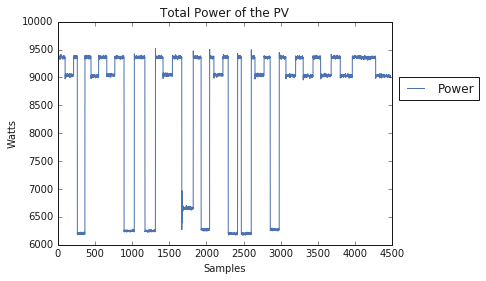

In [347]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# fig name of the plot and ax is the data in the plot
fig, ax = plt.subplots()
#Separte the axis
x  = data.index
y1 = data['Power']
# Plot data
curve1 = ax.plot(x, y1, '-b', label='Power')
#ax.axis('equal')

# Add legend  - loc is a tuple specifying the bottom left corner
#ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
#ax.legend(loc='upper left', frameon=False)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc=(1.02, 0.65))

plt.xlabel('Samples')
plt.ylabel('Watts')
plt.title('Total Power of the PV')
plt.plot()
# Show plot
plt.show()

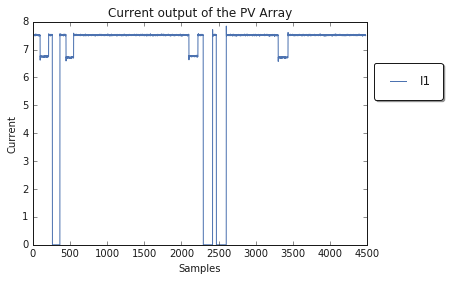

In [353]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y1 = data['I1']
# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='I1')
# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Current')
plt.title('Current output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc=(1.02, 0.65), fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.show()

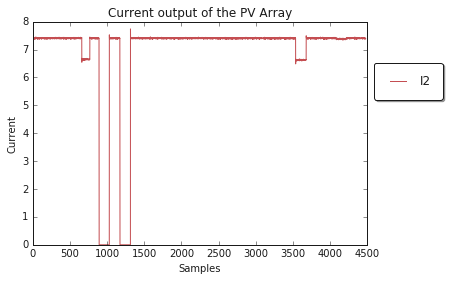

In [356]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y2 = data['I2']
# Plot data
#styles = ['-', '--', '-.', ':']
curve2 = ax.plot(x, y2, '-r', label='I2')
# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Current')
plt.title('Current output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc=(1.02, 0.65), fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.show()

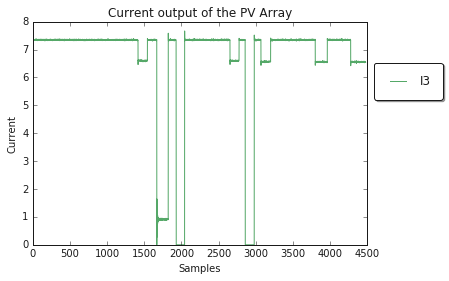

In [357]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y3 = data['I3']
# Plot data
#styles = ['-', '--', '-.', ':']
curve3 = ax.plot(x, y3, '-g', label='I3')

# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Current')
plt.title('Current output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc=(1.02, 0.65), fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.show()

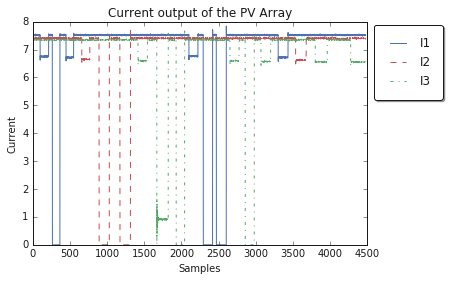

In [358]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y1 = data['I1']
y2 = data['I2']
y3 = data['I3']
# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='I1')
curve2 = ax.plot(x, y2, '--r', label='I2')
curve3 = ax.plot(x, y3, '-.g', label='I3')

# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Current')
plt.title('Current output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc=(1.02, 0.65), fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.show()

# voltages

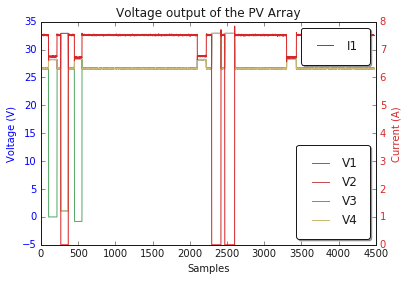

In [420]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
#fig = plt.figure()
# Add subplot to figure
fig, ax = plt.subplots()

#Separte the axis
x  = data.index
y1 = data['V1']
y2 = data['V2']
y3 = data['V3']
y4 = data['V4']

# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='V1')
curve2 = ax.plot(x, y2, '-r', label='V2')
curve3 = ax.plot(x, y3, '-g', label='V3')
curve4 = ax.plot(x, y4, '-y', label='V4')

ax2 =ax.twinx() # instantiate a second axes that shares the same x-axis
y5 = data['I1']
color = 'tab:red'
ax2.set_ylabel('Current (A)', color=color)  # we already handled the x-label with ax1
curve5 = ax2.plot(x, y5, color=color, label='I1')
ax2.tick_params(axis='y', labelcolor=color)


# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Voltage (V)', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
plt.title('Voltage output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False) loc=(1.02, 0.65)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.savefig('my_plot.png')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

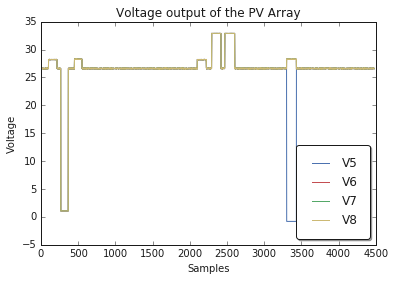

In [404]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y1 = data['V5']
y2 = data['V6']
y3 = data['V7']
y4 = data['V8']
# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='V5')
curve2 = ax.plot(x, y2, '-r', label='V6')
curve3 = ax.plot(x, y3, '-g', label='V7')
curve4 = ax.plot(x, y4, '-y', label='V8')
# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Voltage')
plt.title('Voltage output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False) loc=(1.02, 0.65)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.savefig('my_plot.png')
plt.show()

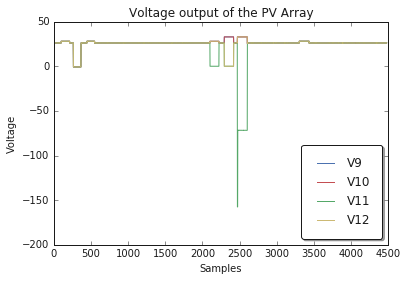

In [406]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y1 = data['V9']
y2 = data['V10']
y3 = data['V11']
y4 = data['V12']
# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='V9')
curve2 = ax.plot(x, y2, '-r', label='V10')
curve3 = ax.plot(x, y3, '-g', label='V11')
curve4 = ax.plot(x, y4, '-y', label='V12')
# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Voltage')
plt.title('Voltage output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False) loc=(1.02, 0.65)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.savefig('my_plot.png')
plt.show()

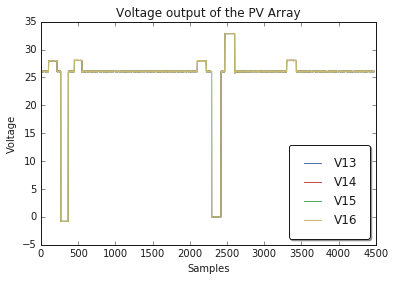

In [407]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y1 = data['V13']
y2 = data['V14']
y3 = data['V15']
y4 = data['V16']
# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='V13')
curve2 = ax.plot(x, y2, '-r', label='V14')
curve3 = ax.plot(x, y3, '-g', label='V15')
curve4 = ax.plot(x, y4, '-y', label='V16')
# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Voltage')
plt.title('Voltage output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False) loc=(1.02, 0.65)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.savefig('my_plot.png')
plt.show()

# Find Max number of Clusters

In [389]:
# Multiple row and column selections using iloc and DataFrame
#data.iloc[0:5] # first five rows of dataframe
#data.iloc[:, 0:2] # first two columns of data frame with all rows
#data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
#data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).
x = data.iloc[:, [0,1,6]]
x

,Power,I1,V3
0,9751.855054,7.824120,26.973406
1,9327.646501,7.493863,26.581026
2,9343.714000,7.504908,26.545014
3,9344.852760,7.505353,26.503568
4,9360.422049,7.516942,26.568483
...,...,...,...
4473,9014.819058,7.495612,26.594667
4474,9035.946557,7.520766,26.610559
4475,9021.186553,7.501417,26.634718
4476,9003.430889,7.497170,26.662162


# The Elbow Method

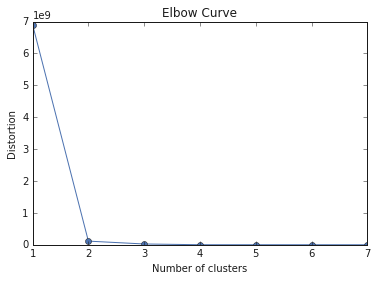

In [397]:
#Extract the 3 dimension (Voltage, current and power)
x = data.iloc[:, [0,1,6]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

# K-means clustering using 'scikit-learn'

 Using the preceding code, we set the number of desired clusters to 3. We set n_init=10 to run the k-means clustering algorithms 10 times independently with different random centroids to choose the final model as the one with the lowest SSE. Via the max_iter parameter, we specify the maximum number of iterations for each single run (here, 300).

In [234]:
kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

kmeans = KMeans.fit(data)
centroids = kmeans.cluster_centers_

Text(0.5, 0.92, '5 Clusters')

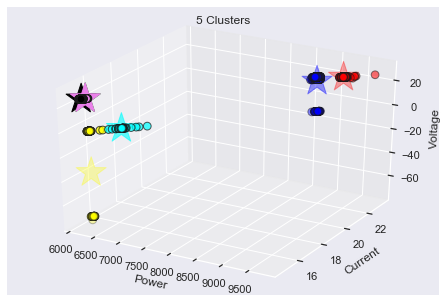

In [275]:
labels = kmeans.predict(data)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'black', 'violet']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 47], c=asignar,s=60, edgecolor='k')
ax.scatter(C[:, 0], C[:, 1], C[:, 47], marker='*', c=colores, s=1000)


ax.set_xlabel('Power')
ax.set_ylabel('Current')
ax.set_zlabel('Voltage')
ax.set_title('5 Clusters')

Text(0.5, 0.92, '5 Clusters')

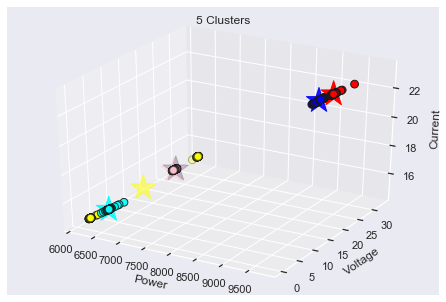

In [262]:
labels = kmeans.predict(data)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'pink', 'violet']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
# data.iloc[:, 0] data.iloc[:, 1] data.iloc[:, 48]
ax.scatter(data.iloc[:, 0], data.iloc[:, 48], data.iloc[:, 1], c=asignar,s=60, edgecolor='k')
ax.scatter(C[:, 0], C[:, 48], C[:, 1], marker='*', c=colores, s=700)


ax.set_xlabel('Power')
ax.set_ylabel('Voltage')
ax.set_zlabel('Current')
ax.set_title('5 Clusters')

Text(0.5, 0.92, '5 Clusters')

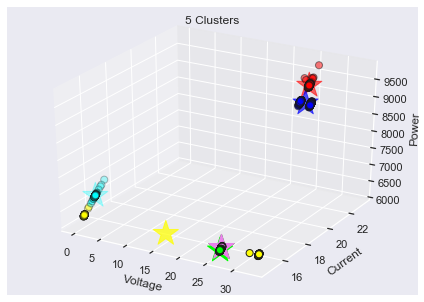

In [261]:
labels = kmeans.predict(data)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'lime', 'violet']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1])
ax.scatter(data.iloc[:, 48], data.iloc[:, 1], data.iloc[:, 0], c=asignar,s=50, edgecolor='k')
ax.scatter(C[:, 48], C[:, 1], C[:, 0], marker='*', c=colores, s=700)


ax.set_xlabel('Voltage')
ax.set_ylabel('Current')
ax.set_zlabel('Power')
ax.set_title('5 Clusters')

Text(0.5, 0.92, '5 Clusters')

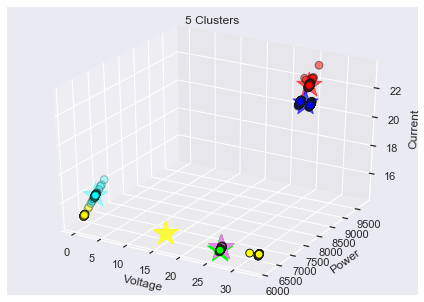

In [263]:
labels = kmeans.predict(data)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'lime', 'violet']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1])
# data.iloc[:, 0] data.iloc[:, 1] data.iloc[:, 48]
ax.scatter(data.iloc[:, 48], data.iloc[:, 0], data.iloc[:, 1], c=asignar,s=60, edgecolor='k')
ax.scatter(C[:, 48], C[:, 0], C[:, 1], marker='*', c=colores, s=700)


ax.set_xlabel('Voltage')
ax.set_ylabel('Power')
ax.set_zlabel('Current')
ax.set_title('5 Clusters')

Text(0.5, 0.92, '5 Clusters')

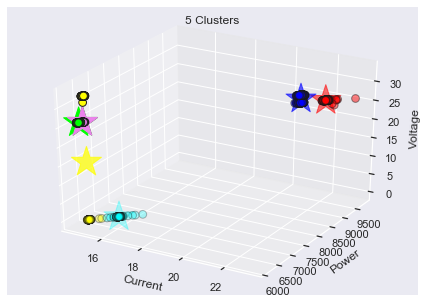

In [251]:
labels = kmeans.predict(data)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'lime', 'violet']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1])
# data.iloc[:, 0] data.iloc[:, 1] data.iloc[:, 48]
ax.scatter(data.iloc[:, 1], data.iloc[:, 0], data.iloc[:, 48], c=asignar,s=60, edgecolor='k')
ax.scatter(C[:, 1], C[:, 0], C[:, 48], marker='*', c=colores, s=1000)


ax.set_xlabel('Current')
ax.set_ylabel('Power')
ax.set_zlabel('Voltage')
ax.set_title('5 Clusters')

# Algorithm T-sne

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [299]:
data = pd.read_csv('data.csv')
print(str(data.shape))
data.head()

(4478, 52)


,Power,I1,I2,I3,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48
0,9751.855054,7.824120,7.711217,7.659327,26.981230,26.981230,26.973406,26.981230,26.981230,26.981230,26.981230,26.981230,25.676113,25.676113,25.668289,25.676113,25.676113,25.676113,25.676113,25.676113,26.671016,26.671016,26.671016,26.671016,26.671016,26.663305,26.671016,26.671016,26.671016,26.671016,26.671016,26.671016,25.299624,25.299624,25.299624,25.299624,26.994014,26.994014,26.994014,27.049819,26.994014,26.994014,25.923836,25.923836,25.916177,25.923836,25.923836,25.923836,25.923836,25.916177,25.923836,25.923836
1,9327.646501,7.493863,7.377357,7.315667,26.595084,26.590496,26.581026,26.581640,26.578936,26.585754,26.587160,26.583894,26.062479,26.069642,26.060009,26.065635,26.065134,26.072235,26.070926,26.070032,26.478466,26.477668,26.476426,26.474413,26.482970,26.469285,26.475883,26.476126,26.479430,26.476434,26.489208,26.478249,25.867613,25.877451,25.868928,25.871414,26.661633,26.660812,26.669658,26.673472,26.663793,26.660827,26.130718,26.121655,26.121467,26.123370,26.125228,26.124651,26.115087,26.125892,26.122222,26.119418
2,9343.714000,7.504908,7.394960,7.328464,26.558807,26.554412,26.545014,26.545930,26.543340,26.549870,26.551216,26.548088,26.091001,26.097861,26.088307,26.094023,26.093544,26.100345,26.099091,26.098235,26.496072,26.495309,26.494121,26.492195,26.500382,26.486952,26.493602,26.493834,26.496995,26.494128,26.506349,26.495865,25.799716,25.809128,25.800974,25.803352,26.700060,26.699275,26.707725,26.714043,26.702123,26.699290,26.101107,26.092450,26.091930,26.094089,26.095863,26.095312,26.086177,26.096156,26.092992,26.090314
3,9344.852760,7.505353,7.400048,7.327035,26.517370,26.512969,26.503568,26.504474,26.501881,26.508420,26.509769,26.506636,26.129142,26.136012,26.126455,26.132169,26.131689,26.138499,26.137244,26.136387,26.511278,26.510513,26.509321,26.507391,26.515597,26.502148,26.508801,26.509034,26.512203,26.509329,26.521579,26.511070,25.747493,25.756928,25.748755,25.751138,26.732124,26.731338,26.739803,26.715153,26.734191,26.731353,26.082333,26.073660,26.073154,26.075302,26.077079,26.076527,26.067376,26.077387,26.074203,26.071521
4,9360.422049,7.516942,7.404808,7.343132,26.582297,26.577895,26.568483,26.569400,26.566807,26.573346,26.574695,26.571562,26.075063,26.081934,26.072365,26.078091,26.077610,26.084422,26.083166,26.082308,26.486919,26.486153,26.484961,26.483030,26.491241,26.477783,26.484440,26.484673,26.487844,26.484968,26.497227,26.486711,25.842258,25.851699,25.843520,25.845905,26.680422,26.679636,26.688099,26.670853,26.682488,26.679651,26.121293,26.112622,26.112098,26.114264,26.116041,26.115489,26.106339,26.116331,26.113165,26.110483


In [307]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4478 samples in 0.013s...
[t-SNE] Computed neighbors for 4478 samples in 0.510s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4478
[t-SNE] Computed conditional probabilities for sample 2000 / 4478
[t-SNE] Computed conditional probabilities for sample 3000 / 4478
[t-SNE] Computed conditional probabilities for sample 4000 / 4478
[t-SNE] Computed conditional probabilities for sample 4478 / 4478
[t-SNE] Mean sigma: 1.546746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.106129
[t-SNE] KL divergence after 300 iterations: 0.825544


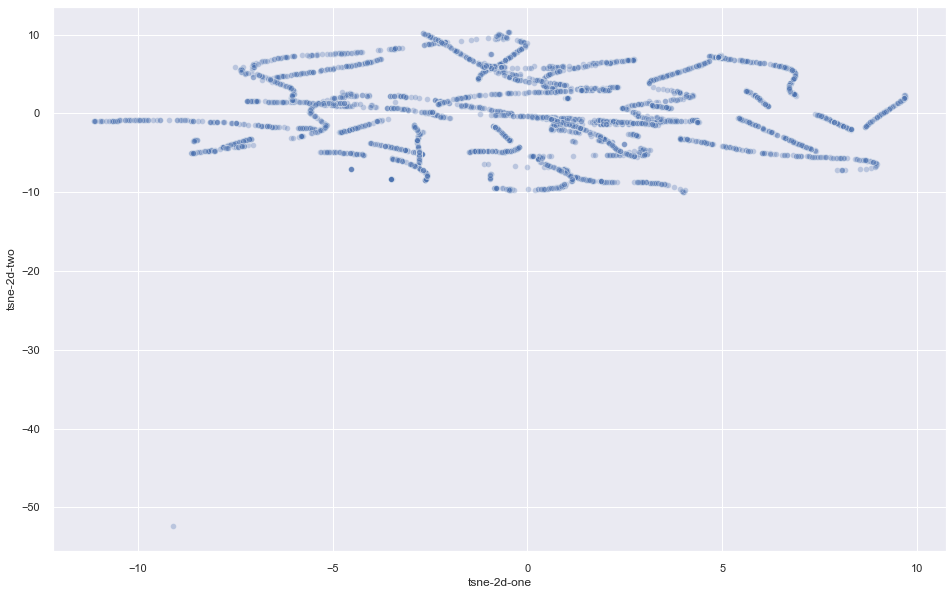

In [306]:
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=data,
    legend="full",
    alpha=0.3
)